🦜 Uncomment the following code for the [TidyTuesday Bird Bath dataset](https://github.com/rfordatascience/tidytuesday/tree/master/data/2021/2021-08-31).🦉

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df_birdbath = read_csv(
     'https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-08-31/bird_baths.csv?raw=true',
     col_types = cols()
)

Each row represents the number of times a type of bird was observed at a bird bath in the survey year.

We want to just work with the most numerous birds for baths that have been categorized as "Urban" or "Rural."

Find the top fifteen bird types by total `bird_count` after filtering out baths where `urban_rural` category is not provided. Capture this vector with a variable called `top15_bird_types`. 

Hint: remember `pull` and `slice_max` 

In [15]:
df_birdbath |>
    filter(is.na(urban_rural)) |>
    group_by(bird_type) |>
    summarize(total_bird_count = sum(bird_count)) |>
    arrange(desc(total_bird_count))
#instead of group_by and summarize, can use count: count(bird_tytpe, wt = bird_count)


bird_type,total_bird_count
<chr>,<dbl>
Noisy Miner,292
Australian Magpie,262
Rainbow Lorikeet,235
Red Wattlebird,171
Superb Fairy-wren,170
Magpie-lark,160
Pied Currawong,157
Crimson Rosella,155
Eastern Spinebill,153


In [17]:
top15_bird_types = df_birdbath |>
    filter(!is.na(urban_rural)) |>
    group_by(bird_type) |>
    summarize(total_bird_count = sum(bird_count)) |>
    slice_max(order_by = total_bird_count, n = 15) |>
    pull(bird_type)

top15_bird_types

[1] "Noisy Miner"        "Australian Magpie"  "Rainbow Lorikeet"  
 [4] "Red Wattlebird"     "Superb Fairy-wren"  "Magpie-lark"       
 [7] "Pied Currawong"     "Crimson Rosella"    "Eastern Spinebill" 
[10] "Spotted Dove"       "Lewin's Honeyeater" "Satin Bowerbird"   
[13] "Crested Pigeon"     "Grey Fantail"       "Red-browed Finch"

1. Create a table of just the top birds using the vector of top 15 bird types to filter. Exclude rows with `NA` vlues for `urban_rural`.
1. Group by `bird_type` and `urban_rural` and find the mean `bird_count` for each group.
1. Sort the factor levels for `bird_type` by `bird_count` value at `Rural` baths.
1. Capture the output of these operations under a new variable.

Your final table will have three columns: 1) `bird_type`, 2) `urban_rural` and 3) `mean_bird_count`

In [25]:
df_birdbath2 = df_birdbath |>
    filter(!is.na(urban_rural), bird_type %in% top15_bird_types) |>
    group_by(bird_type, urban_rural) |>
    summarize(mean_bird_count = mean(bird_count), .groups = 'drop') |>
    arrange(urban_rural, mean_bird_count) |>
    mutate(bird_type = fct_inorder(bird_type))

df_birdbath2 |> head()

bird_type,urban_rural,mean_bird_count
<chr>,<chr>,<dbl>
Spotted Dove,Rural,0.03741497
Crested Pigeon,Rural,0.09523810
Pied Currawong,Rural,0.10884354
Magpie-lark,Rural,0.11224490
Red Wattlebird,Rural,0.11904762
Rainbow Lorikeet,Rural,0.13605442


In [28]:
df_birdbath2 |> pull(bird_type)

[1] "Spotted Dove"       "Crested Pigeon"     "Pied Currawong"    
 [4] "Magpie-lark"        "Red Wattlebird"     "Rainbow Lorikeet"  
 [7] "Satin Bowerbird"    "Noisy Miner"        "Crimson Rosella"   
[10] "Australian Magpie"  "Red-browed Finch"   "Grey Fantail"      
[13] "Lewin's Honeyeater" "Eastern Spinebill"  "Superb Fairy-wren" 
[16] "Grey Fantail"       "Red-browed Finch"   "Lewin's Honeyeater"
[19] "Superb Fairy-wren"  "Eastern Spinebill"  "Crimson Rosella"   
[22] "Satin Bowerbird"    "Crested Pigeon"     "Pied Currawong"    
[25] "Magpie-lark"        "Red Wattlebird"     "Spotted Dove"      
[28] "Australian Magpie"  "Rainbow Lorikeet"   "Noisy Miner"

Make a "Urban"/"Rural" [Cleveland dot chart](https://uc-r.github.io/public/images/visual/cleveland-dotplots/unnamed-chunk-10-1.png) figure with your new table. 

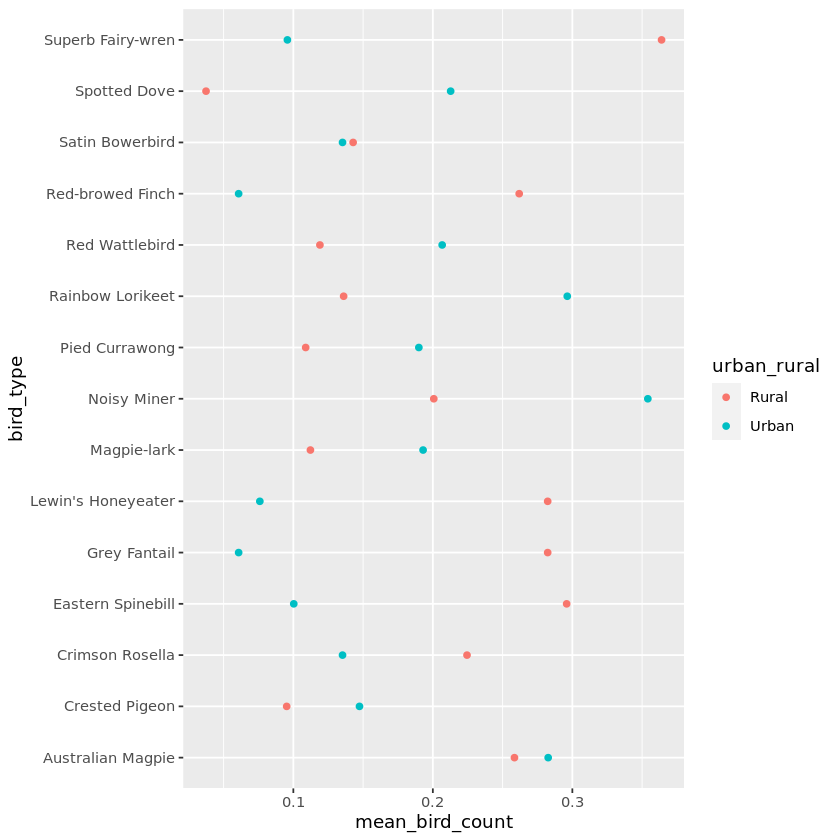

In [27]:
p = ggplot(df_birdbath2, aes(x = mean_bird_count, y = bird_type, color = urban_rural))

p = p + geom_point()

p

If we want to add "segments" to our dot chart, we need to re-shape our data into "wide" format. Specifically we want to have "Urban" and "Rural" as **columns** instead of **values**.

Use `pivot_wider` to make this wide table, capture it, and use `geom_segment` in combination with your wide table to add segments to your Cleveland dot chart from above 👆.

In [33]:
df_birdbath2 |> 
    pivot_wider(names_from = 'urban_rural', values_from = 'mean_bird_count')
    

bird_type,Rural,Urban
<chr>,<dbl>,<dbl>
Spotted Dove,0.03741497,0.21276596
Crested Pigeon,0.09523810,0.14741641
Pied Currawong,0.10884354,0.18996960
Magpie-lark,0.11224490,0.19300912
Red Wattlebird,0.11904762,0.20668693
Rainbow Lorikeet,0.13605442,0.29635258
Satin Bowerbird,0.14285714,0.13525836
Noisy Miner,0.20068027,0.35410334
Crimson Rosella,0.22448980,0.13525836


In [34]:
p = ggplot(df_birdbath2, aes(x = mean_bird_count, y = bird_type)) +
    geom_point(aes(color = urban_rural)) +
    geom_segment(aes(y = bird_type, yend = bird_type, x = Rural, xend = Urban), 
                 data = df_birdbath3)

p

ERROR: Error in eval(expr, envir, enclos): object 'df_birdbath3' not found


(Uncomment the code and make the cell below markdown to see my solution.)

In [31]:
# ![](https://github.com/chuckpr/BIOS512/blob/main/in-class-exercises/12/12_01_pivot_chart.png?raw=true)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:3: unexpected '['
1:  ![
      ^
